#### 金融科技学
liyan_zjgsu@163.com

#### kNN算法

在sklearn库中，可以使用`sklearn.neighbors.KNeighborsClassifier`创建一个K近邻分类器，主要参数有：
- n_neighbors：用于指定分类器中K的大小(默认值为5，注意与kmeans的区别) 
- weights：设置选中的K个点对分类结果影响的权重（默认值为平均权重“uniform”，可以选择“distance”代表越近的点权重越高，或者传入自己编写的以距离为参数的权重计算函数）
- algorithm：设置用于计算临近点的方法。因为当数据量很大的情况下计算当前点和所有点的距离再选出最近的k各点，这个计算量是很费时的，所以（选项中有ball_tree、kd_tree和brute，分别代表不同的近邻搜索优化算法，默认值为auto，根据训练数据自动选择）
- metric：指定距离度量方法，一般使用欧式距离
    - 'euclidean' ：欧式距离
    - 'manhattan'：曼哈顿距离
    - 'chebyshev'：切比雪夫距离
    - 'minkowski'： 闵可夫斯基距离，默认参数

[sklearn.neighbours: kNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

红酒数据集：

In [10]:
import pandas as pd
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['class'] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


使用红酒数据集构造kNN分类器：

In [28]:
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

wine = datasets.load_wine()
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=0)

k = 5
weights = 'distance'
clf = neighbors.KNeighborsClassifier(n_neighbors=k, weights=weights)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
acc_s = accuracy_score(y_test, y_predict)
print(acc_s)

0.8333333333333334


Exercise2：

    使用交叉验证方法为红酒数据集选择合适的k，并在独立的测试集上评估knn模型的效果。

#### 聚类和分类的区别

聚类算法与分类算法的最终的目的都是将数据区分开来，但是两者的实现过程完全不同。分类问题，通过对已有标签的数据进行训练来确定最佳预测模型，然后对新样本的所属类别进行预测，在这个过程中算法模型只要尽可能地实现最佳拟合即可。与分类问题不同，聚类问题没有任何标签，因此**找相似**是解决聚类问题的核心方法。

#### k-means算法

`sklearn.cluster.KMeans`的主要参数：
- n_clusters：用于指定聚类中心的个数，默认为8
- init：初始聚类中心的初始化方法，默认为k-means++
- max_iter：最大的迭代次数，默认为300
- 一般调用时只用给出n_clusters即可

[sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

模型评估：[聚类问题评估](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)

下例中，我们使用make_blobs生成样本数据，并设置 [n_clusters = 2] not equal to [number of sample_label = 3]，  
进行k-means聚类：

[0 1 2]


Text(0.5, 1.0, 'colored by predict_label')

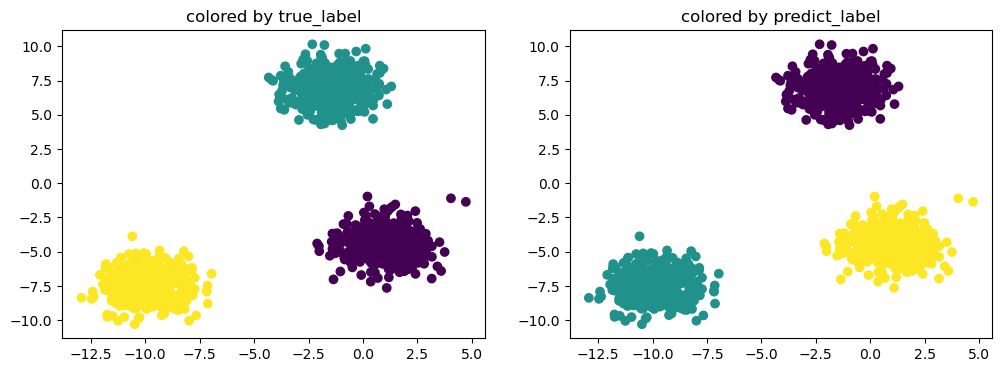

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 100
X, y = make_blobs(n_samples=n_samples, random_state = random_state)
print(np.unique(y))

y_predict = KMeans(n_clusters = 3, random_state = random_state).fit_predict(X)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('colored by true_label')
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=y_predict)
plt.title('colored by predict_label')

使用make_circles生成非凸数据样本：

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 100
X, y = make_blobs(n_samples=n_samples, random_state = random_state)
print(np.unique(y))

X.shape

[0 1 2]


(1500, 2)

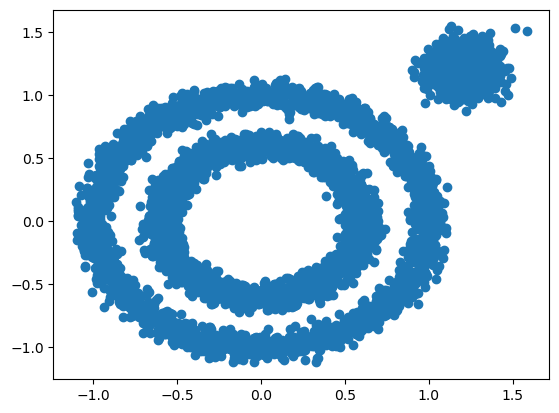

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs

rs = 100
X1, y1 = make_circles(n_samples=5000, factor=0.6, noise=0.05, random_state=rs)
X2, y2 = make_blobs(n_samples=1000, n_features=2, centers=[[1.2, 1.2]], cluster_std=[[.1]], random_state=rs)

X = np.r_[X1, X2]
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

Kmeans聚类效果：

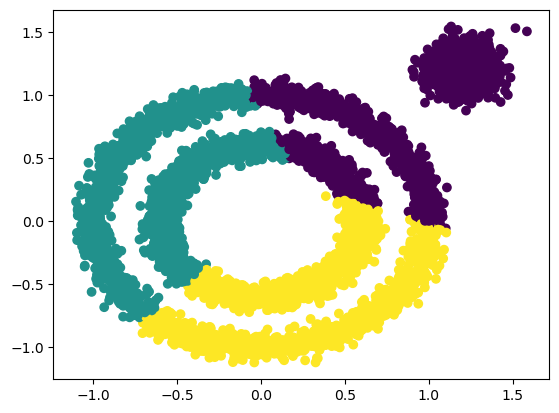

In [31]:
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=3, random_state=rs).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()
